# **Project: Investigate a Dataset (Polish IT job board data from 2022)**

## The data extraction range is from February 2022-November 2022.

#### In this project I will be analyzing economic datasets downloaded from the Kaggler website (https://www.kaggle.com/datasets/kriegsmaschine/polish-it-job-board-data-from-2022) to analyze IT job offers market in Poland, based on the most popular job website. Different variables for measurement will be used, which are:
* Number of bids by experience
* Number of offers in Polish cities
* Main skills based on experience

#### **We will be answering the following questions in our data exploration:**
* In our data mining, we will answer the following questions:
* What is the requirement in the market for employment by experience?
* Which cities have a need for more and which for less experienced workers?
* Which technology is currently most in demand?

#### **Note:**
#### The data extraction range is from February 2022-November 2022.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [5]:
# Read the database

jjit = pd.read_csv('/Users/michaladryjanek/Desktop/justjoin.csv')

In [7]:
# Let's look how database looks like
jjit.head()

#### **Initial Observations**

#### We can see the exact date of publication of the announcement. We will isolate the month of publication of the ad to see the number of offers in a particular month on this basis.

In [10]:
# Add month column
jjit['Month_of_Publish'] = jjit['Published_at'].str[5:7]
jjit['Month_of_Publish'] = jjit['Month_of_Publish'].astype('int32')
# Filtering the chart
jjit.filter(items=['Title', 'Experience_level', 'Month_of_Publish'])

,Title,Experience_level,Month_of_Publish
0,Senior Frontend Software Engineer,senior,7
1,Sr. Backend Engineer,senior,7
2,Sr. Backend Engineer,senior,5
3,Sr. Backend Engineer,senior,5
4,Python Developer (4 days/week),mid,6
...,...,...,...
37782,Programista Java,mid,10
37783,Angular Developer,mid,10
37784,Analityk/Projektant,mid,10
37785,Programista Java,mid,10


In [12]:
# Checking how many offers there are in general 
jjit['Month_of_Publish'].value_counts()

In [14]:
# Checking how many bids there are in each experience category
jjit['Experience_level'].value_counts()

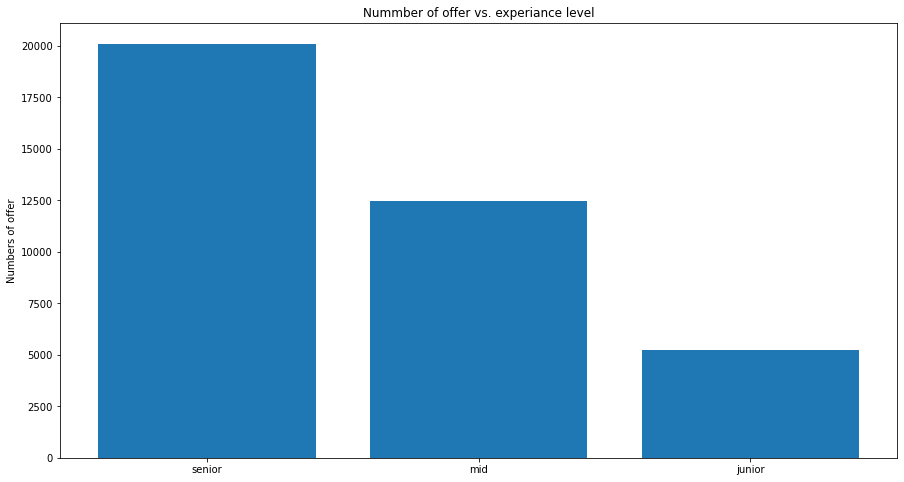

In [17]:
import matplotlib.pyplot as plt

numbers_of_offers = {'Experience_level': ['senior', 'mid', 'junior'],
                     'Numbers_of_offers': [20106, 12458, 5223]}
numbers_of_offers = pd.DataFrame(numbers_of_offers)
numbers_of_offers

fig, ax = plt.subplots(figsize=(15, 8))


experience_level = numbers_of_offers['Experience_level']
numers_of_offers = numbers_of_offers['Numbers_of_offers']


ax.bar(experience_level, numers_of_offers)

ax.set_ylabel('Numbers of offer')
ax.set_title('Nummber of offer vs. experiance level')

plt.show()

In [26]:
# Filtering offers based on experiance

JuniorJobs = jjit.Experience_level == "junior"
MidJobs = jjit.Experience_level == "mid"
SeniorJobs = jjit.Experience_level == "senior"

In [23]:
# Counting offers for every month

jjit[JuniorJobs]['Month_of_Publish'].value_counts()

jjit[MidJobs]['Month_of_Publish'].value_counts()

jjit[SeniorJobs]['Month_of_Publish'].value_counts()

4     3934
10    1711
3     1341
5     1276
6     1181
7      966
8      709
9      532
11     471
2      337
Name: Month_of_Publish, dtype: int64

In [25]:
jjit[MidJobs]['Month_of_Publish'].value_counts()

4     6437
10    2649
3     2250
5     2092
6     1888
7     1558
8     1069
9      837
2      669
11     657
Name: Month_of_Publish, dtype: int64

In [60]:
jjit[JuniorJobs]['Month_of_Publish'].value_counts()

4     1626
6      722
3      647
5      620
7      575
10     453
8      169
2      160
9      157
11      94
Name: Month_of_Publish, dtype: int64

In [27]:
# Making new frame for numbers of offers based on experiance

senior_number_of_offers = {'Month_of_Publish': [4, 10, 3,5,6,7,8,9,11,2],
                     'senior_numer_of_offers': [3934, 1711, 1341, 1276, 1181, 966, 709, 532, 471, 337],
                          }                     
senior_number_of_offers = pd.DataFrame(senior_number_of_offers)

###################################################################################################

mid_number_of_offers = {'Month_of_Publish': [4, 10, 3,5,6,7,8,9,11,2],
                     'mid_numer_of_offers': [6437, 2649, 2250, 2092, 1888, 1558, 1069, 837, 669, 657],
                       }
mid_number_of_offers = pd.DataFrame(mid_number_of_offers)

###################################################################################################

junior_number_of_offers = {'Month_of_Publish': [4, 10, 3,5,6,7,8,9,11,2],
                     'junior_numer_of_offers': [1626, 722, 647, 620, 575, 453, 169, 160, 157, 94],
                       }
junior_number_of_offers = pd.DataFrame(junior_number_of_offers)

js = senior_number_of_offers.merge(junior_number_of_offers)
all = js.merge(mid_number_of_offers).sort_values(by='Month_of_Publish')
all

,Month_of_Publish,senior_numer_of_offers,junior_numer_of_offers,mid_numer_of_offers
9,2,337,94,657
2,3,1341,647,2250
0,4,3934,1626,6437
3,5,1276,620,2092
4,6,1181,575,1888
5,7,966,453,1558
6,8,709,169,1069
7,9,532,160,837
1,10,1711,722,2649
8,11,471,157,669


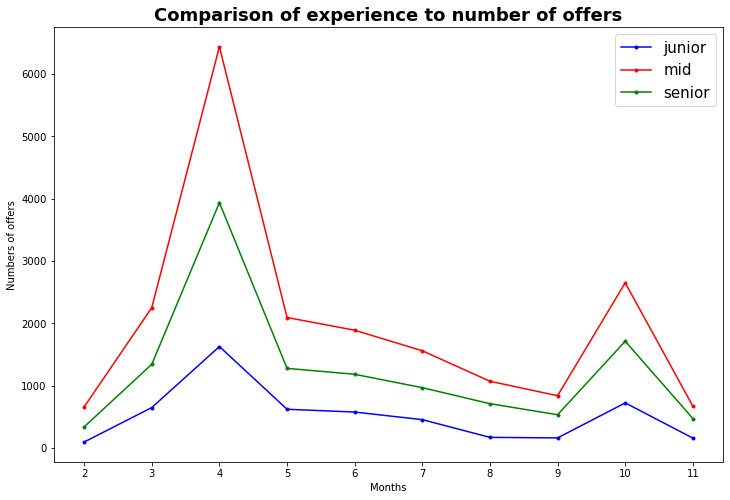

In [62]:
# comparison of experience to number of offers

plt.figure(figsize=(12,8))

plt.title('Comparison of experience to number of offers', fontdict={'fontweight':'bold', 'fontsize': 18})

junior = plt.plot(all.Month_of_Publish, all.junior_numer_of_offers, 'b.-', label='junior')
mid = plt.plot(all.Month_of_Publish, all.mid_numer_of_offers, 'r.-', label='mid')
senior = plt.plot(all.Month_of_Publish, all.senior_numer_of_offers, 'g.-', label='senior')


plt.xticks(all.Month_of_Publish)


plt.xlabel('Months')
plt.ylabel('Numbers of offers')

plt.legend(fontsize=15)

plt.show()